In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

Importing Dataset

In [3]:
df=pd.read_csv('exoplanets.csv', skiprows=144, index_col='rowid')

In [4]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,Done,2017-08-31,CANDIDATE,0.811,0,0,0,0,q1_q17_dr25_koi,CENT_SATURATED,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,-0.000009,2454955.763,0.000009,-0.000009,0.0,NaN,NaN,NaN,NaN,NaN,0.818,0.001,-0.001,1.74319,0.00107,-0.00107,NaN,NaN,NaN,14230.9,4.2,-4.2,0.123871,0.000051,-0.000071,1.83538,0.00587,-0.00846,LS+MCMC,13.04,0.51,-0.51,0.0354,NaN,NaN,84.41,NaN,NaN,1339.0,NaN,NaN,761.46,106.21,-95.76,8.3977,0.0269,-0.0269,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2676,0.3928,q1_q17_dr25_koi,544.170100,6468.04000,4304.3,1,432,1,q1_q17_dr25_tce,11111110111011101000000000000000,0.1522,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,011/011446/011446443/dv/kplr011446443-20160209...,011/011446/011446443/dv/kplr011446443-001-2016...,5820.0,78.0,-78.0,4.457,0.024,-0.024,-0.06,0.15,-0.15,0.964,0.038,-0.038,0.971,0.062,-0.056,NaN,NaN,NaN,q1_q17_dr25_stellar,286.80847,49.316399,11.338,11.736,11.275,11.168,11.126,10.232,9.920,9.846,0.0,19.120564,4.600000e-08,49.316430,4.900000e-07,-0.0232,0.0016,0.1066,0.0018,-0.000120,0.000120,0.000780,0.000190,-0.009,0.068,-0.300,0.160,0.30,0.160,0.015,0.069,-0.270,0.170,0.270,0.170
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,Done,2017-08-31,CANDIDATE,1.000,0,1,0,0,q1_q17_dr25_koi,MOD_SEC_DV---PLANET_OCCULT_DV---MOD_SEC_ALT---...,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,-0.000016,2454954.359,0.000016,-0.000016,0.0,NaN,NaN,NaN,NaN,NaN,0.224,0.159,-0.216,3.88864,0.00203,-0.00203,NaN,NaN,NaN,6674.7,1.7,-1.7,0.075522,0.000298,-0.000350,0.37936,0.02846,-0.02633,LS+MCMC,16.10,0.81,-0.91,0.0376,NaN,NaN,87.21,NaN,NaN,2048.0,NaN,NaN,4148.92,651.59,-654.46,4.6020,0.3450,-0.3450,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.3168,0.2958,q1_q17_dr25_koi,232.270000,3862.18460,5945.9,1,611,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010666/010666592/dv/kplr010666592-20160209...,010/010666/010666592/

In [5]:
df.shape

(8054, 140)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8054 entries, 1 to 8054
Columns: 140 entries, kepid to koi_dikco_msky_err
dtypes: float64(115), int64(8), object(17)
memory usage: 8.7+ MB


Droping and Renaming columns

In [7]:
df=df.loc[:,['kepid','kepoi_name','kepler_name','koi_disposition','koi_pdisposition', 'koi_score', 'koi_fpflag_nt','koi_fpflag_ss', 'koi_fpflag_co','koi_fpflag_ec',
'koi_period',
'koi_period_err1',
'koi_period_err2',
'koi_time0bk',
'koi_time0bk_err1',
'koi_time0bk_err2',
'koi_impact',
'koi_impact_err1',
'koi_impact_err2',
'koi_duration',
'koi_duration_err1',
'koi_duration_err2',
'koi_depth',
'koi_depth_err1',
'koi_depth_err2',
'koi_prad',
'koi_prad_err1',
'koi_prad_err2',
'koi_teq',
'koi_teq_err1',
'koi_teq_err2',
'koi_insol',
'koi_insol_err1',
'koi_insol_err2',
'koi_model_snr',
'koi_tce_plnt_num',
'koi_tce_delivname',
'koi_steff',
'koi_steff_err1',
'koi_steff_err2',
'koi_slogg',
'koi_slogg_err1',
'koi_slogg_err2',
'koi_srad',
'koi_srad_err1',
'koi_srad_err2',
'ra',
'dec',
'koi_kepmag']]

In [8]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days]',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days]',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days]',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD]',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD]',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs]',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs]',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs]',
'koi_depth':'TransitDepth[ppm]',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm]',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm]',
'koi_prad':'PlanetaryRadius[Earthradii]',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii]',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii]',
'koi_teq':'EquilibriumTemperature[K]',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K]',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K]',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux]',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux]',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K]',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K]',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K]',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii]',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii]',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD],TransitEpochLowerUnc.[BKJD],ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs],TransitDurationUpperUnc.[hrs],TransitDurationLowerUnc.[hrs],TransitDepth[ppm],TransitDepthUpperUnc.[ppm],TransitDepthLowerUnc.[ppm],PlanetaryRadius[Earthradii],PlanetaryRadiusUpperUnc.[Earthradii],PlanetaryRadiusLowerUnc.[Earthradii],EquilibriumTemperature[K],EquilibriumTemperatureUpperUnc.[K],EquilibriumTemperatureLowerUnc.[K],InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux],InsolationFluxLowerUnc.[Earthflux],TransitSignal-to-Nois,TCEPlanetNumber,TCEDeliver,StellarEffectiveTemperature[K],StellarEffectiveTemperatureUpperUnc.[K],StellarEffectiveTemperatureLowerUnc.[K],StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,-0.000009,0.818,0.001,-0.001,1.74319,0.00107,-0.00107,14230.9,4.2,-4.2,13.04,0.51,-0.51,1339.0,NaN,NaN,761.46,106.21,-95.76,4304.3,1,q1_q17_dr25_tce,5820.0,78.0,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,-0.000016,0.224,0.159,-0.216,3.88864,0.00203,-0.00203,6674.7,1.7,-1.7,16.10,0.81,-0.91,2048.0,NaN,NaN,4148.92,651.59,-654.46,5945.9,1,q1_q17_dr25_tce,6440.0,76.0,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0.913,0,0,0,0,4.887803,4.660000e-07,-4.660000e-07,124.813081,0.000075,-0.000075,0.054,0.145,-0.054,2.36255,0.00466,-0.00466,4315.8,6.1,-6.1,4.82,0.17,-0.18,800.0,NaN,NaN,96.67,14.91,-13.89,862.3,1,q1_q17_dr25_tce,4778.0,86.0,-95.0,4.591,0.015,-0.036,0.763,0.028,-0.028,297.70935,48.080853,9.174
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,3.849372,2.344000e-06,-2.344000e-06,157.526686,0.000488,-0.000488,0.915,0.020,-0.056,2.63200,0.10600,-0.10600,1298.6,13.0,-13.0,12.94,1.80,-4.20,2034.0,NaN,NaN,4055.29,1643.78,-2336.51,132.7,1,q1_q17_dr25_tce,6244.0,126.0,-114.0,3.657,0.270,-0.090,2.992,0.416,-0.971,294.35654,38.947380,11.432
5,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,0,4.780328,8.520000e-07,-8.520000e-07,132.974086,0.000148,-0.000148,0.952,0.001,-0.002,2.02530,0.01390,-0.01390,960.8,3.9,-3.9,7.14,0.52,-0.31,1441.0,NaN,NaN,1020.05,223.43,-125.20,380.8,1,q1_q17_dr25_tce,5937.0,83.0,-65.0,4.012,0.030,-0.030,1.787,0.132,-0.076,289.73972,44.647419,11.665


Converting target variable in numerical value

In [9]:
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [10]:
df.shape

(8054, 51)

In [11]:

df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K]',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K]'], inplace=True)

checking null values

In [12]:
df.isna().sum()

DispositionScore                                   0
OrbitalPeriod[days]                                0
OrbitalPeriodUpperUnc.[days]                     150
OrbitalPeriodLowerUnc.[days]                     150
TransitEpoch[BKJD                                  0
TransitEpochUpperUnc.[BKJD]                      150
TransitEpochLowerUnc.[BKJD]                      150
ImpactParamete                                    59
ImpactParameterUpperUnc                          150
ImpactParameterLowerUnc                          150
TransitDuration[hrs]                               0
TransitDurationUpperUnc.[hrs]                    150
TransitDurationLowerUnc.[hrs]                    150
TransitDepth[ppm]                                 59
TransitDepthUpperUnc.[ppm]                       150
TransitDepthLowerUnc.[ppm]                       150
PlanetaryRadius[Earthradii]                       59
PlanetaryRadiusUpperUnc.[Earthradii]              59
PlanetaryRadiusLowerUnc.[Earthradii]          

dropping null values

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(7803, 39)

In [15]:
df.head(10)

,DispositionScore,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD],TransitEpochLowerUnc.[BKJD],ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs],TransitDurationUpperUnc.[hrs],TransitDurationLowerUnc.[hrs],TransitDepth[ppm],TransitDepthUpperUnc.[ppm],TransitDepthLowerUnc.[ppm],PlanetaryRadius[Earthradii],PlanetaryRadiusUpperUnc.[Earthradii],PlanetaryRadiusLowerUnc.[Earthradii],EquilibriumTemperature[K],InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux],InsolationFluxLowerUnc.[Earthflux],TransitSignal-to-Nois,TCEPlanetNumber,StellarEffectiveTemperature[K],StellarEffectiveTemperatureUpperUnc.[K],StellarEffectiveTemperatureLowerUnc.[K],StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
rowid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.811,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,-0.000009,0.818,0.001,-0.001,1.74319,0.00107,-0.00107,14230.9,4.2,-4.2,13.04,0.51,-0.51,1339.0,761.46,106.21,-95.76,4304.3,1,5820.0,78.0,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338,1,2
2,1.000,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,-0.000016,0.224,0.159,-0.216,3.88864,0.00203,-0.00203,6674.7,1.7,-1.7,16.10,0.81,-0.91,2048.0,4148.92,651.59,-654.46,5945.9,1,6440.0,76.0,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463,1,2
3,0.913,4.887803,4.660000e-07,-4.660000e-07,124.813081,0.000075,-0.000075,0.054,0.145,-0.054,2.36255,0.00466,-0.00466,4315.8,6.1,-6.1,4.82,0.17,-0.18,800.0,96.67,14.91,-13.89,862.3,1,4778.0,86.0,-95.0,4.591,0.015,-0.036,0.763,0.028,-0.028,297.70935,48.080853,9.174,1,2
4,1.000,3.849372,2.344000e-06,-2.344000e-06,157.526686,0.000488,-0.000488,0.915,0.020,-0.056,2.63200,0.10600,-0.10600,1298.6,13.0,-13.0,12.94,1.80,-4.20,2034.0,4055.29,1643.78,-2336.51,132.7,1,6244.0,126.0,-114.0,3.657,0.270,-0.090,2.992,0.416,-0.971,294.35654,38.947380,11.432,1,2
5,1.000,4.780328,8.520000e-07,-8.520000e-07,132.974086,0.000148,-0.000148,0.952,0.001,-0.002,2.02530,0.01390,-0.01390,960.8,3.9,-3.9,7.14,0.52,-0.31,1441.0,1020.05,223.43,-125.20,380.8,1,5937.0,83.0,-65.0,4.012,0.030,-0.030,1.787,0.132,-0.076,289.73972,44.647419,11.665,1,1
6,0.000,1.334101,1.655000e-06,-1.655000e-06,133.703081,0.000983,-0.000983,0.153,0.228,-0.153,2.10330,0.03180,-0.03180,120.8,3.3,-3.3,1.74,0.31,-0.37,2169.0,5207.55,2517.09,-2268.59,43.0,1,6178.0,111.0,-136.0,4.106,0.168,-0.112,1.580,0.277,-0.339,294.59955,38.366772,12.161,0,0
7,1.000,3.213669,1.090000e-06,-1.090000e-06,123.611878,0.000274,-0.000274,0.021,0.188,-0.021,3.98235,0.00911,-0.00911,727.8,2.5,-2.5,4.13,0.26,-0.23,1515.0,1244.44,229.31,-193.94,346.9,1,5795.0,69.0,-77.0,4.101,0.033,-0.027,1.545,0.097,-0.087,285.61533,50.135750,12.211,1,2
8,0.000,1.160153,8.680000e-07,-8.680000e-07,121.704645,0.000673,-0.000673,0.748,0.025,-0.515,1.34330,0.01950,-0.01950,170.2,4.1,-4.1,1.40,0.20,-0.12,1751.0,2229.29,910.20,-505.19,48.4,1,5842.0,105.0,-117.0,4.433,0.072,-0.117,0.985,0.143,-0.083,298.66101,41.137890,12.450,0,0
9,0.000,3.719809,9.390000e-07,-9.390000e-07,135.068298,0.000206,-0.000206,1.279,0.169,-0.078,3.53170,0.01050,-0.01050,2958.2,10.1,-10.1,87.21,16.61,-28.45,1873.0,2912.21,1650.97,-1719.77,373.9,1,6284.0,160.0,-160.0,3.813,0.292,-0.097,2.348,0.447,-0.766,288.80377,49.530788,13.123,0,0


finding outliers 

In [16]:
from sklearn.ensemble import IsolationForest
import seaborn as sns

Isolation forest finds anomaly in data based on decision Tree algorithm

In [17]:
clf = IsolationForest(contamination=0.01)
outliers = clf.fit_predict(df)

<AxesSubplot:xlabel='InsolationFlux[Earthflux', ylabel='ExoplanetCandidate'>

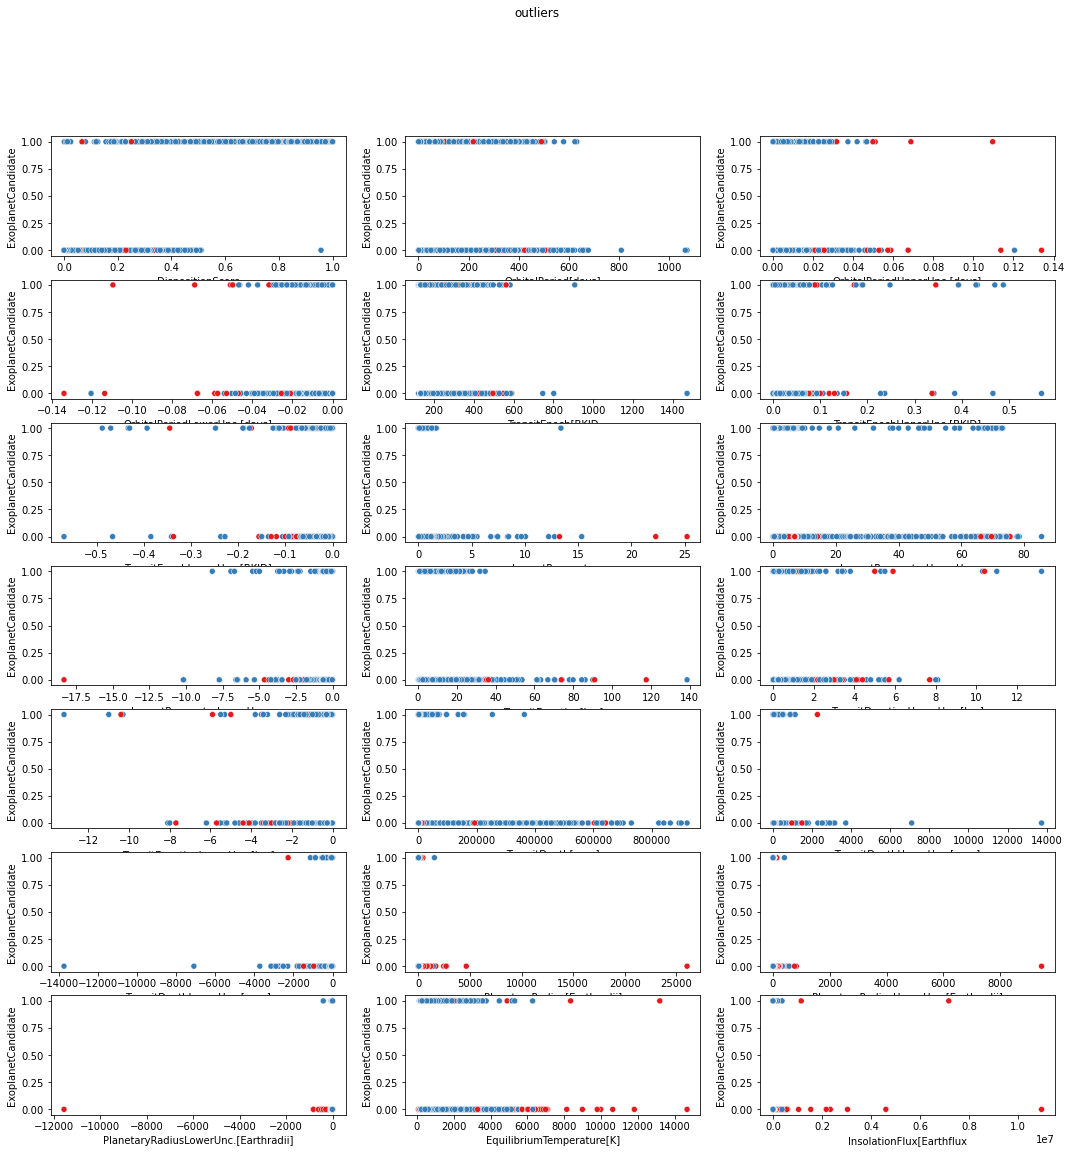

In [18]:
fig, axes = plt.subplots(7, 3, figsize=(18, 18))
fig.suptitle('outliers')
sns.scatterplot(ax=axes[0, 0], data=df, x=df[df.columns[0]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[0, 1], data=df, x=df[df.columns[1]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[0, 2], data=df, x=df[df.columns[2]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[1, 0], data=df, x=df[df.columns[3]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[1, 1], data=df, x=df[df.columns[4]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[1, 2], data=df, x=df[df.columns[5]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[2, 0], data=df, x=df[df.columns[6]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[2, 1], data=df, x=df[df.columns[7]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[2, 2], data=df, x=df[df.columns[8]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[3, 0], data=df, x=df[df.columns[9]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[3, 1], data=df, x=df[df.columns[10]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[3, 2], data=df, x=df[df.columns[11]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[4, 0], data=df, x=df[df.columns[12]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[4, 1], data=df, x=df[df.columns[13]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[4, 2], data=df, x=df[df.columns[14]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[5, 0], data=df, x=df[df.columns[15]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[5, 1], data=df, x=df[df.columns[16]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[5, 2], data=df, x=df[df.columns[17]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[6, 0], data=df, x=df[df.columns[18]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[6, 1], data=df, x=df[df.columns[19]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)
sns.scatterplot(ax=axes[6, 2], data=df, x=df[df.columns[20]], y=df.ExoplanetCandidate, hue=outliers, palette='Set1', legend=False)

In [19]:
df['outliers']=outliers

In [20]:
out=df.loc[df.outliers==-1]

In [21]:
out.shape

(79, 40)

There are 79 outliers

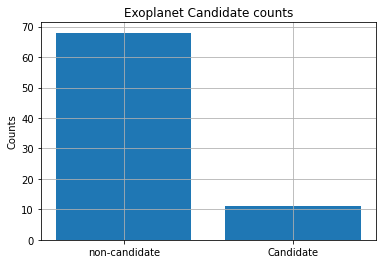

In [22]:
plt.bar(["non-candidate", "Candidate"],out.ExoplanetCandidate.value_counts())
plt.grid()
plt.title("Exoplanet Candidate counts")
plt.ylabel("Counts")
plt.show()

In [23]:
df=df[df.outliers==1]

droping outliers

In [24]:
df.drop(columns=['outliers'],inplace=True)

In [25]:
df.shape

(7724, 39)

In [26]:
features = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
target = df.ExoplanetCandidate

In [27]:
target.value_counts()

1    3985
0    3739
Name: ExoplanetCandidate, dtype: int64

checking if our dataset is balanced

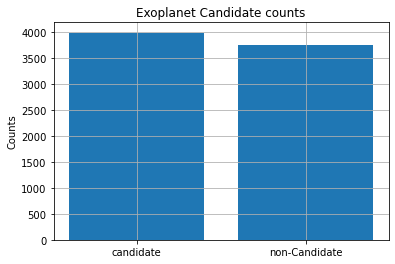

In [28]:
plt.bar(["candidate", "non-Candidate"],target.value_counts())
plt.grid()
plt.title("Exoplanet Candidate counts")
plt.ylabel("Counts")
plt.show()

correlation between columns

In [29]:
correlation_mat = features.corr().abs()
correlation_mat

,DispositionScore,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD],TransitEpochLowerUnc.[BKJD],ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs],TransitDurationUpperUnc.[hrs],TransitDurationLowerUnc.[hrs],TransitDepth[ppm],TransitDepthUpperUnc.[ppm],TransitDepthLowerUnc.[ppm],PlanetaryRadius[Earthradii],PlanetaryRadiusUpperUnc.[Earthradii],PlanetaryRadiusLowerUnc.[Earthradii],EquilibriumTemperature[K],InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux],InsolationFluxLowerUnc.[Earthflux],TransitSignal-to-Nois,TCEPlanetNumber,StellarEffectiveTemperature[K],StellarEffectiveTemperatureUpperUnc.[K],StellarEffectiveTemperatureLowerUnc.[K],StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
DispositionScore,1.000000,0.068135,0.096562,0.096562,0.004119,0.022678,0.022678,0.260900,0.115827,0.103822,0.175346,0.093701,0.093701,0.302576,0.155357,0.155357,0.271114,0.255095,0.233352,0.329736,0.138322,0.133078,0.138265,0.277123,0.222224,0.202559,0.379161,0.339371,0.141314,0.159527,0.232003,0.120736,0.190483,0.159948,0.166101,0.091524,0.043452
OrbitalPeriod[days],0.068135,1.000000,0.660313,0.660313,0.595941,0.179288,0.179288,0.038011,0.034128,0.019353,0.355923,0.301626,0.301626,0.041712,0.011783,0.011783,0.032118,0.033712,0.038355,0.397712,0.081149,0.079359,0.075172,0.033697,0.018114,0.024052,0.019604,0.007609,0.057178,0.012260,0.012389,0.043069,0.012587,0.031009,0.043068,0.017151,0.023630
OrbitalPeriodUpperUnc.[days],0.096562,0.660313,1.000000,1.000000,0.385187,0.349374,0.349374,0.054511,0.003358,0.024502,0.272320,0.470993,0.470993,0.060373,0.010502,0.010502,0.046186,0.043297,0.040304,0.215534,0.039945,0.038998,0.036985,0.067499,0.049164,0.030890,0.038792,0.027218,0.018185,0.014209,0.053192,0.012570,0.011753,0.013223,0.040503,0.022449,0.007455
OrbitalPeriodLowerUnc.[days],0.096562,0.660313,1.000000,1.000000,0.385187,0.349374,0.349374,0.054511,0.003358,0.024502,0.272320,0.470993,0.470993,0.060373,0.010502,0.010502,0.046186,0.043297,0.040304,0.215534,0.039945,0.038998,0.036985,0.067499,0.049164,0.030890,0.038792,0.027218,0.018185,0.014209,0.053192,0.012570,0.011753,0.013223,0.040503,0.022449,0.007455
TransitEpoch[BKJD,0.004119,0.595941,0.385187,0.385187,1.000000,0.067602,0.067602,0.004302,0.055127,0.025265,0.195084,0.136592,0.136592,0.037611,0.000362,0.000362,0.010093,0.010204,0.041090,0.308591,0.075538,0.072622,0.071564,0.031684,0.028128,0.010635,0.005180,0.008022,0.015394,0.038112,0.006665,0.006018,0.024594,0.018944,0.027546,0.007991,0.042053
TransitEpochUpperUnc.[BKJD],0.022678,0.179288,0.349374,0.349374,0.067602,1.000000,1.000000,0.066658,0.014126,0.041917,0.170556,0.495548,0.495548,0.105551,0.068023,0.068023,0.080803,0.073327,0.064715,0.080400,0.027851,0.026030,0.027334,0.121061,0.054637,0.043023,0.036742,0.035669,0.024605,0.027098,0.058322,0.010372,0.022912,0.011885,0.019332,0.004046,0.005164
TransitEpochLowerUnc.[BKJD],0.022678,0.179288,0.349374,0.349374,0.067602,1.000000,1.000000,0.066658,0.014126,0.041917,0.170556,0.495548,0.495548,0.105551,0.068023,0.068023,0.080803,0.073327,0.064715,0.080400,0.027851,0.026030,0.027334,0.121061,0.054637,0.043023,0.036742,0.035669,0.024605,0.027098,0.058322,0.010372,0.022912,0.011885,0.019332,0.004046,0.005164
ImpactParamete,0.260900,0.038011,0.054511,0.054511,0.004302,0.066658,0.066658,1.000000,0.320807,0.334309,0.069742,0.035982,0.035982,0.033260,0.048097,0.048097,0.699516,0.670583,0.419916,0.069649,0.023672,0.025737,0.035742,0.051044,0.063998,0.102888,0.147499,0.134570,0.024014,0.073273,0.110354,0.001415,0.040924,0.037659,0.063630,0.021786,0.013429
ImpactParameterUpperUnc,0.115827,0.034128,0.003358,0.003358,0.055127,0.014126,0.014126,0.320807,1.000000,0.428953,0.

drping highly correlated columns

In [30]:
upper = correlation_mat.where(np.triu(np.ones(correlation_mat.shape), k=1).astype(np.bool))
high_correlated = [column for column in upper.columns if any(upper[column] > 0.9)]

In [31]:
high_correlated

['OrbitalPeriodLowerUnc.[days]',
 'TransitEpochLowerUnc.[BKJD]',
 'TransitDurationLowerUnc.[hrs]',
 'TransitDepthLowerUnc.[ppm]',
 'PlanetaryRadiusUpperUnc.[Earthradii]']

In [32]:
features.drop(columns=high_correlated, inplace=True)

<AxesSubplot:>

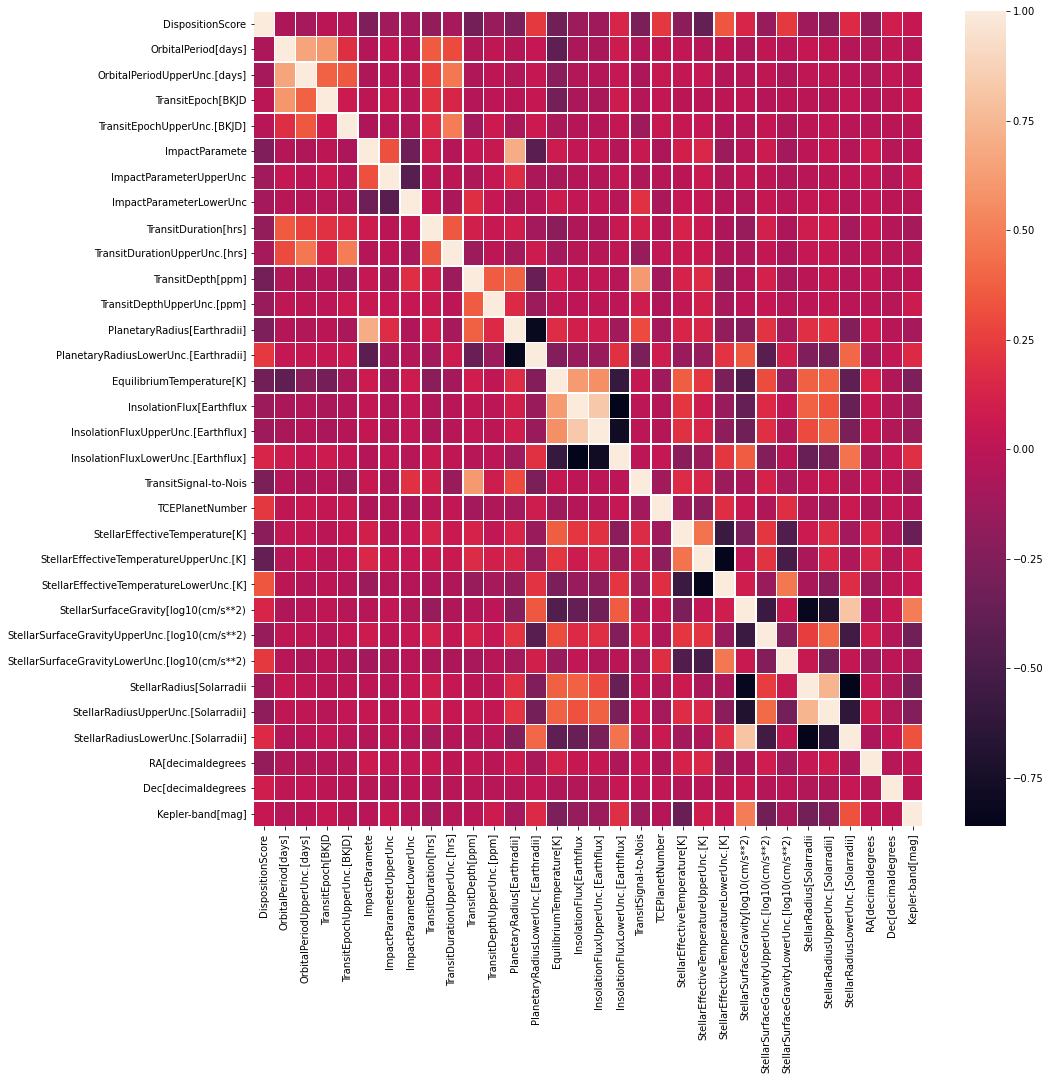

In [33]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(features.corr(), annot=False, linewidths=.5, ax=ax)

In [34]:
final_df=pd.concat([features,target],axis=1)

In [35]:
final_df.reset_index(drop=True,inplace=True)

In [36]:
final_df

,DispositionScore,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD],ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs],TransitDurationUpperUnc.[hrs],TransitDepth[ppm],TransitDepthUpperUnc.[ppm],PlanetaryRadius[Earthradii],PlanetaryRadiusLowerUnc.[Earthradii],EquilibriumTemperature[K],InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux],InsolationFluxLowerUnc.[Earthflux],TransitSignal-to-Nois,TCEPlanetNumber,StellarEffectiveTemperature[K],StellarEffectiveTemperatureUpperUnc.[K],StellarEffectiveTemperatureLowerUnc.[K],StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate
0,0.811,2.470613,2.700000e-08,122.763305,0.000009,0.818,0.001,-0.001,1.74319,0.00107,14230.9,4.2,13.04,-0.51,1339.0,761.46,106.21,-95.76,4304.3,1,5820.0,78.0,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338,1
1,1.000,2.204735,4.300000e-08,121.358542,0.000016,0.224,0.159,-0.216,3.88864,0.00203,6674.7,1.7,16.10,-0.91,2048.0,4148.92,651.59,-654.46,5945.9,1,6440.0,76.0,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463,1
2,0.913,4.887803,4.660000e-07,124.813081,0.000075,0.054,0.145,-0.054,2.36255,0.00466,4315.8,6.1,4.82,-0.18,800.0,96.67,14.91,-13.89,862.3,1,4778.0,86.0,-95.0,4.591,0.015,-0.036,0.763,0.028,-0.028,297.70935,48.080853,9.174,1
3,1.000,3.849372,2.344000e-06,157.526686,0.000488,0.915,0.020,-0.056,2.63200,0.10600,1298.6,13.0,12.94,-4.20,2034.0,4055.29,1643.78,-2336.51,132.7,1,6244.0,126.0,-114.0,3.657,0.270,-0.090,2.992,0.416,-0.971,294.35654,38.947380,11.432,1
4,1.000,4.780328,8.520000e-07,132.974086,0.000148,0.952,0.001,-0.002,2.02530,0.01390,960.8,3.9,7.14,-0.31,1441.0,1020.05,223.43,-125.20,380.8,1,5937.0,83.0,-65.0,4.012,0.030,-0.030,1.787,0.132,-0.076,289.73972,44.647419,11.665,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,0.131,367.761848,6.747000e-03,194.769700,0.010700,0.025,0.441,-0.025,4.89100,0.39200,428.0,49.6,20.06,-4.17,623.0,35.55,3.67,-17.79,9.8,1,5348.0,63.0,-295.0,2.897,0.045,-0.014,9.888,0.257,-2.058,290.87155,47.753368,10.736,0
7720,0.190,378.654840,2.276000e-02,288.258400,0.034100,0.243,0.219,-0.243,11.30000,2.60000,247.8,77.9,1.53,-0.19,258.0,1.04,0.97,-0.35,6.8,1,6000.0,167.0,-209.0,4.463,0.070,-0.210,0.970,0.306,-0.123,285.24338,47.812592,14.872,0
7721,0.000,384.356448,3.684000e-03,298.903540,0.007740,0.848,0.117,-0.644,3.87200,0.27400,715.7,63.8,3.03,-0.38,255.0,1.00,0.86,-0.33,13.2,1,5903.0,158.0,-193.0,4.445,0.067,-0.202,0.994,0.291,-0.125,293.77362,50.124470,14.391,0
7722,0.000,1.756471,1.486000e-05,132.027570,0.008020,0.023,0.442,-0.023,2.53800,0.26500,69.5,7.6,0.69,-0.06,1405.0,924.14,740.64,-231.04,10.9,1,5813.0,157.0,-157.0,4.561,0.033,-0.176,0.833,0.227,-0.071,296.14072,50.279949,14.723,0


Shuffling the dataset

In [37]:
final_df = final_df.sample(frac = 1)

# Data Visualization

checking the importance of dispositioin score and orbital period

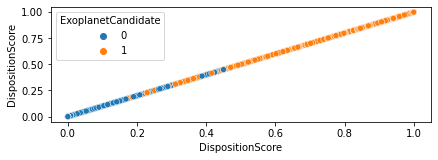

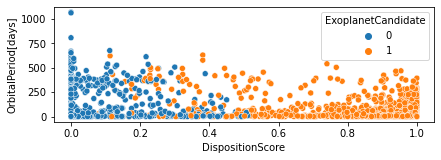

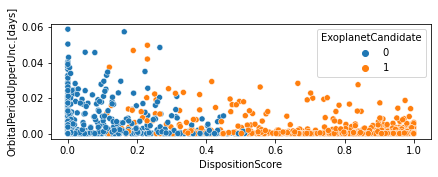

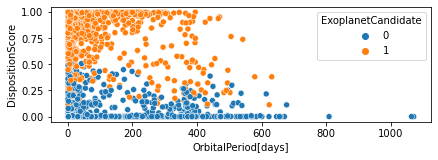

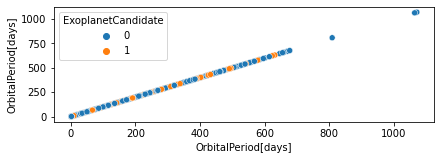

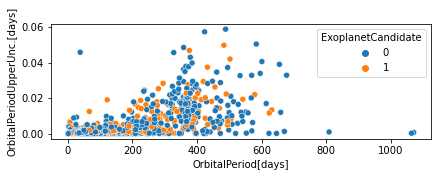

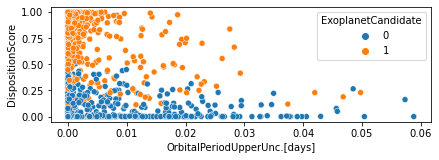

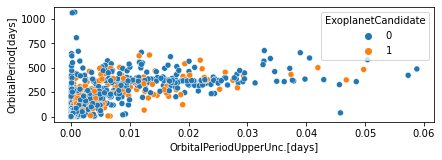

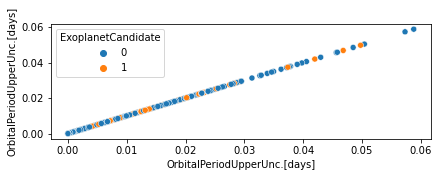

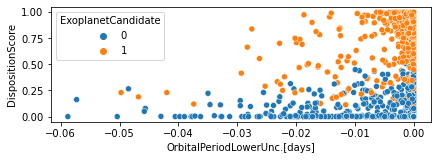

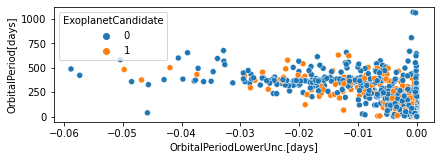

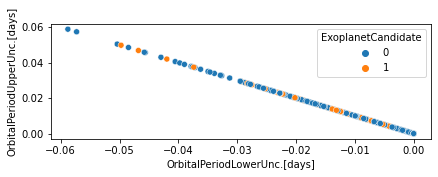

In [38]:
column_name=final_df.columns
count=1

for i in range(4):
    x=df.iloc[:,i]
    x_name=column_name[i]
    for j in range(3):
        plt.subplots(figsize=(15, 30))
        y=df.iloc[:,j]
        y_name=column_name[j]
        plt.subplot(12,2,count)
        sns.scatterplot(x,y,hue=df.ExoplanetCandidate)
        plt.show()
        count=count+1
    
    

how different transit duration and transit depth corelate?

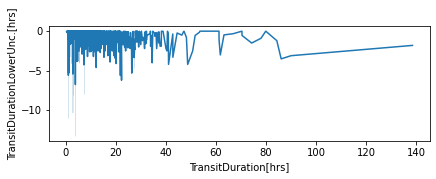

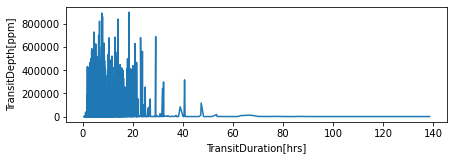

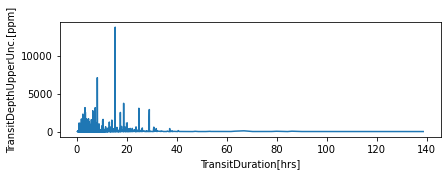

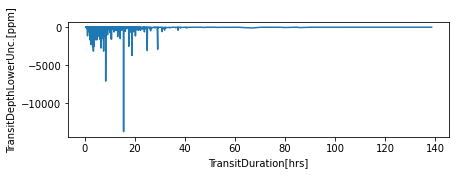

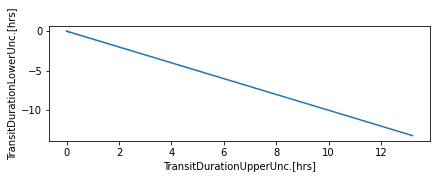

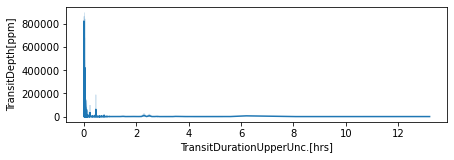

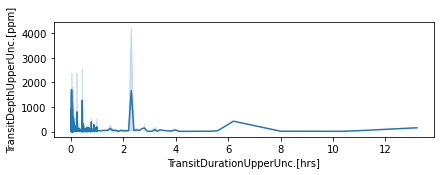

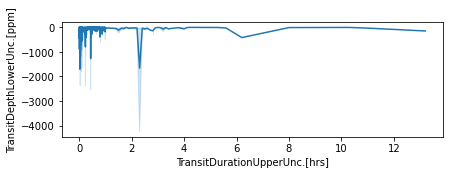

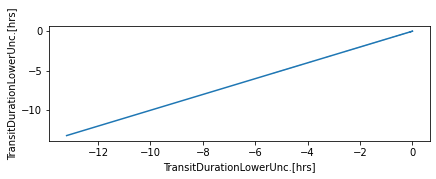

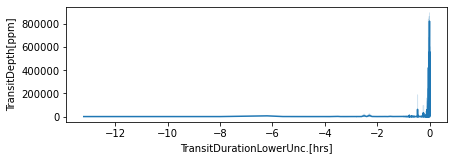

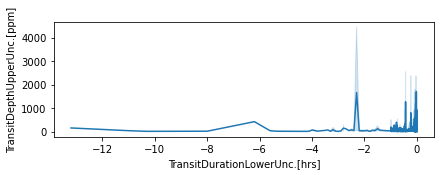

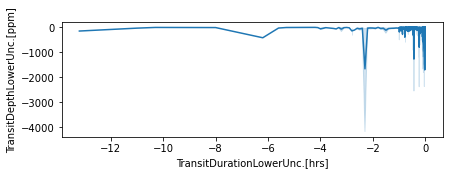

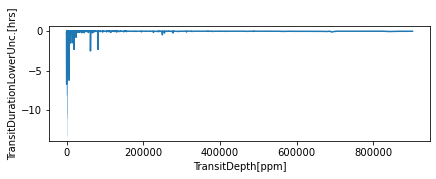

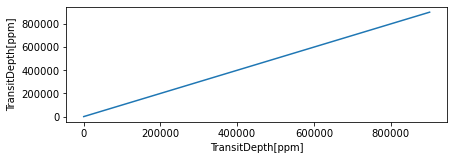

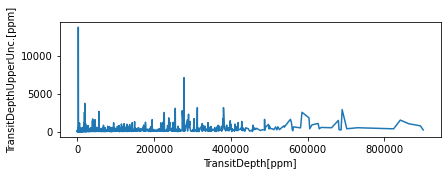

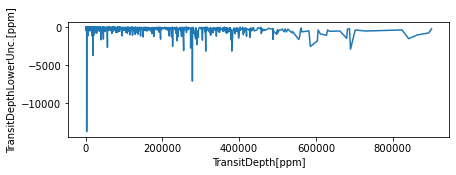

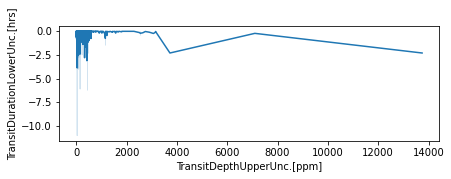

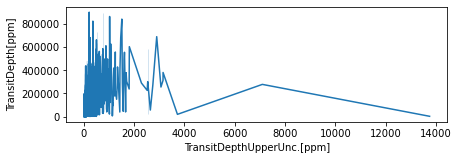

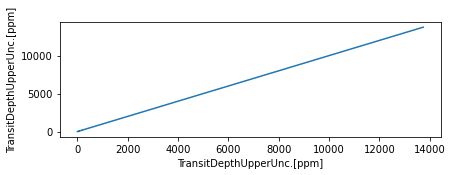

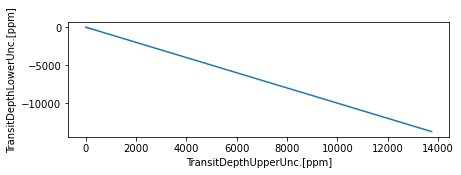

In [39]:
column_name=final_df.columns
count=1

for i in range(10,15):
    x=df.iloc[:,i]
    x_name=column_name[i]
    for j in range(12,16):
        plt.subplots(figsize=(15, 30))
        y=df.iloc[:,j]
        y_name=column_name[j]
        plt.subplot(12,2,count)
        sns.lineplot(x,y)
        plt.show()
        count=count+1

In [38]:
X=features.iloc[:,:].values
y=target.iloc[:].values

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dividing dataset in train test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 0)

scaling values

In [41]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val=sc.transform(X_val)

In [42]:
import tensorflow as tf
from keras import callbacks


# 1. Fully connected Model

In [55]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [56]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [114]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=ann.fit(X_train, y_train, batch_size = 64, validation_data=(X_val, y_val), epochs = 50 , callbacks=[earlystopping])

Epoch 1/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9912 - val_loss: 0.0444 - val_accuracy: 0.9838
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0484 - val_accuracy: 0.9827
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9921 - val_loss: 0.0453 - val_accuracy: 0.9848
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9918 - val_loss: 0.0487 - val_accuracy: 0.9827
Epoch 5/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9914 - val_loss: 0.0422 - val_accuracy: 0.9858
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9932 - val_loss: 0.0479 - val_accuracy: 0.9838
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 0.0516 - val_accuracy: 0.9807
Epoch 8/50
88/88 [==

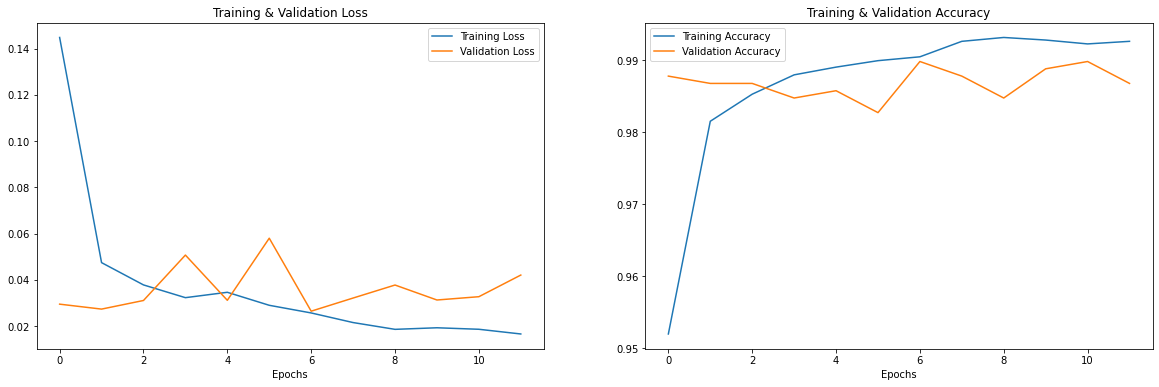

In [49]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , val_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [50]:
print("Accuracy of our model on training data : ")
ann.evaluate(X_train,y_train)[1]*100

Accuracy of our model on training data : 
175/175 [==============================] - 0s 865us/step - loss: 0.0209 - accuracy: 0.9918


99.175626039505

In [51]:
print("Accuracy of our model on test data : ")
ann.evaluate(X_test,y_test)[1]*100

Accuracy of our model on test data : 
37/37 [==============================] - 0s 818us/step - loss: 0.0359 - accuracy: 0.9888


98.87834191322327

# ---------------------------------------------------------------------------------------

# 2. LSTM model

In [58]:
xtrain=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
xtest=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
xval=np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [71]:
lstm= tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(units=128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
lstm.add(tf.keras.layers.Dropout(0.2))


lstm.add(tf.keras.layers.LSTM(units = 64, return_sequences = True))
lstm.add(tf.keras.layers.Dropout(0.2))

lstm.add(tf.keras.layers.LSTM(units = 32, return_sequences = True))
lstm.add(tf.keras.layers.Dropout(0.2))

lstm.add(tf.keras.layers.LSTM(units = 16, return_sequences = True))
lstm.add(tf.keras.layers.Dropout(0.2))


lstm.add(tf.keras.layers.Flatten())
lstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [72]:
lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 32, 128)           66560     
                                                                 
 dropout_6 (Dropout)         (None, 32, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 32, 64)            49408     
                                                                 
 dropout_7 (Dropout)         (None, 32, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 32, 32)            12416     
                                                                 
 dropout_8 (Dropout)         (None, 32, 32)            0         
                                                                 
 lstm_9 (LSTM)               (None, 32, 16)           

In [116]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=lstm.fit(xtrain, y_train, batch_size = 32, validation_data=(xval, y_val), epochs = 50 , callbacks=[earlystopping])

Epoch 1/50
44/44 [==============================] - 4s 86ms/step - loss: 0.0333 - accuracy: 0.9873 - val_loss: 0.0284 - val_accuracy: 0.9878
Epoch 2/50
44/44 [==============================] - 4s 84ms/step - loss: 0.0324 - accuracy: 0.9867 - val_loss: 0.0292 - val_accuracy: 0.9878
Epoch 3/50
44/44 [==============================] - 4s 85ms/step - loss: 0.0329 - accuracy: 0.9871 - val_loss: 0.0295 - val_accuracy: 0.9888
Epoch 4/50
44/44 [==============================] - 4s 86ms/step - loss: 0.0329 - accuracy: 0.9873 - val_loss: 0.0292 - val_accuracy: 0.9878
Epoch 5/50
44/44 [==============================] - 4s 89ms/step - loss: 0.0326 - accuracy: 0.9875 - val_loss: 0.0283 - val_accuracy: 0.9878
Epoch 6/50
44/44 [==============================] - 4s 89ms/step - loss: 0.0338 - accuracy: 0.9873 - val_loss: 0.0298 - val_accuracy: 0.9868
Epoch 7/50
44/44 [==============================] - 4s 93ms/step - loss: 0.0317 - accuracy: 0.9876 - val_loss: 0.0288 - val_accuracy: 0.9878
Epoch 8/50
44

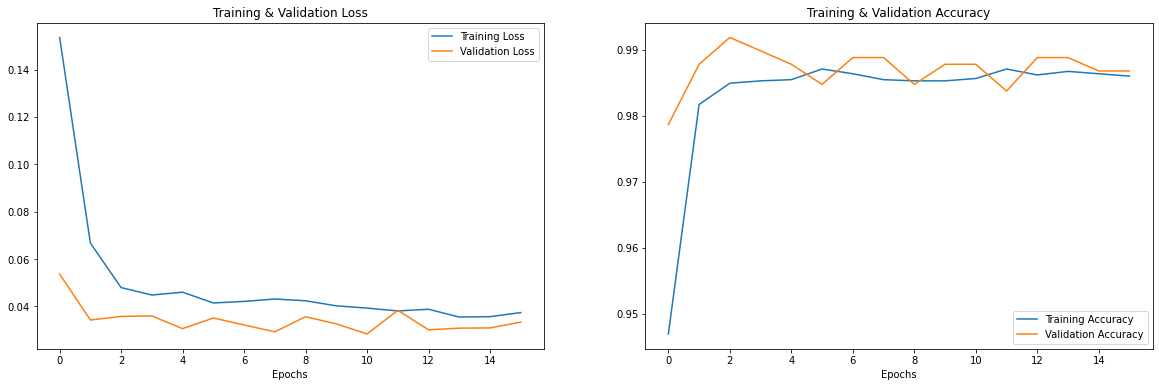

In [58]:
epochs = [i for i in range(16)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , val_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [59]:
print("Accuracy of our model on training data : ")
lstm.evaluate(xtrain,y_train)[1]*100

Accuracy of our model on training data : 
175/175 [==============================] - 3s 17ms/step - loss: 0.0357 - accuracy: 0.9867


98.67383241653442

In [60]:
print("Accuracy of our model on test data : ")
lstm.evaluate(xtest,y_test)[1]*100

Accuracy of our model on test data : 
37/37 [==============================] - 1s 15ms/step - loss: 0.0337 - accuracy: 0.9905


99.0509033203125

# -----------------------------------------------------------------------------------------

# 3. Bidirectional LSTM

In [81]:
blstm= tf.keras.models.Sequential()
blstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(xtrain.shape[1], 1))))
blstm.add(tf.keras.layers.Dropout(0.2))

blstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 32, return_sequences = True)))
blstm.add(tf.keras.layers.Dropout(0.2))

blstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 8, return_sequences = True)))
blstm.add(tf.keras.layers.Dropout(0.2))


blstm.add(tf.keras.layers.Flatten())
blstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [82]:
blstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [117]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=blstm.fit(xtrain, y_train, batch_size = 32, validation_data=(xval, y_val), epochs = 50 , callbacks=[earlystopping])

Epoch 1/50
88/88 [==============================] - 4s 48ms/step - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.0297 - val_accuracy: 0.9868
Epoch 2/50
88/88 [==============================] - 4s 48ms/step - loss: 0.0347 - accuracy: 0.9878 - val_loss: 0.0299 - val_accuracy: 0.9858
Epoch 3/50
88/88 [==============================] - 4s 48ms/step - loss: 0.0323 - accuracy: 0.9887 - val_loss: 0.0291 - val_accuracy: 0.9868
Epoch 4/50
88/88 [==============================] - 4s 48ms/step - loss: 0.0358 - accuracy: 0.9866 - val_loss: 0.0345 - val_accuracy: 0.9858
Epoch 5/50
88/88 [==============================] - 5s 53ms/step - loss: 0.0335 - accuracy: 0.9860 - val_loss: 0.0315 - val_accuracy: 0.9868
Epoch 6/50
88/88 [==============================] - 5s 53ms/step - loss: 0.0386 - accuracy: 0.9858 - val_loss: 0.0341 - val_accuracy: 0.9848
Epoch 7/50
88/88 [==============================] - 5s 53ms/step - loss: 0.0336 - accuracy: 0.9869 - val_loss: 0.0304 - val_accuracy: 0.9878
Epoch 8/50
88

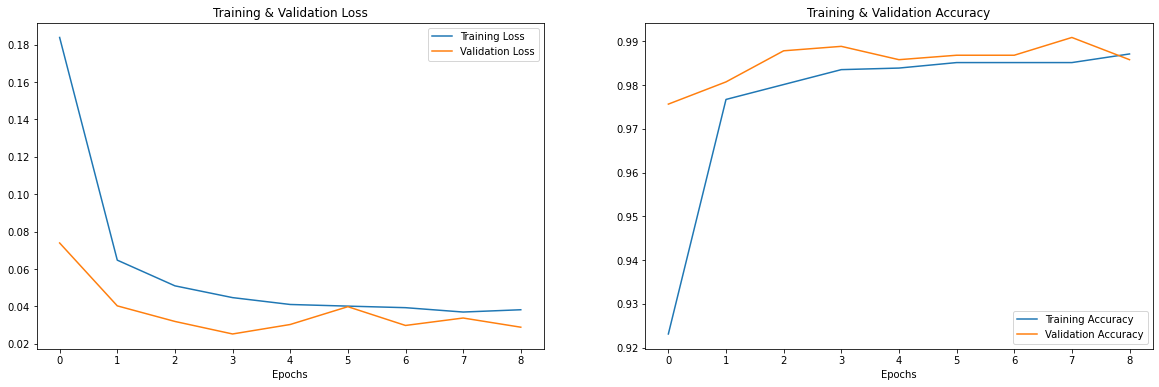

In [65]:
epochs = [i for i in range(9)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , val_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [66]:
print("Accuracy of our model on training data : ")
blstm.evaluate(xtrain,y_train)[1]*100

Accuracy of our model on training data : 
175/175 [==============================] - 2s 10ms/step - loss: 0.0424 - accuracy: 0.9832


98.31541180610657

In [67]:
print("Accuracy of our model on test data : ")
blstm.evaluate(xtest,y_test)[1]*100

Accuracy of our model on test data : 
37/37 [==============================] - 0s 11ms/step - loss: 0.0416 - accuracy: 0.9871


98.70578050613403

# ------------------------------------------------------------------------------

# 4. PCA + Dense Network

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [98]:
pann=tf.keras.models.Sequential()
pann.add(tf.keras.layers.Dense(units=128,activation='relu', input_shape=(23,)))
pann.add(tf.keras.layers.Dropout(0.25))

pann.add(tf.keras.layers.Dense(units=64,activation='relu'))
pann.add(tf.keras.layers.Dense(units=32,activation='relu'))
pann.add(tf.keras.layers.Dropout(0.2))
pann.add(tf.keras.layers.Dense(units=64,activation='relu'))
pann.add(tf.keras.layers.Dropout(0.4))


pann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [99]:
pann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [120]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=pann.fit(X_train_pca, y_train, batch_size = 64, validation_data=(X_val_pca, y_val), epochs = 50 ,shuffle=True , callbacks=[earlystopping])

Epoch 1/50
44/44 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9889 - val_loss: 0.0349 - val_accuracy: 0.9838
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9903 - val_loss: 0.0355 - val_accuracy: 0.9838
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9900 - val_loss: 0.0366 - val_accuracy: 0.9838
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9894 - val_loss: 0.0373 - val_accuracy: 0.9838
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9905 - val_loss: 0.0389 - val_accuracy: 0.9827
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9909 - val_loss: 0.0385 - val_accuracy: 0.9827


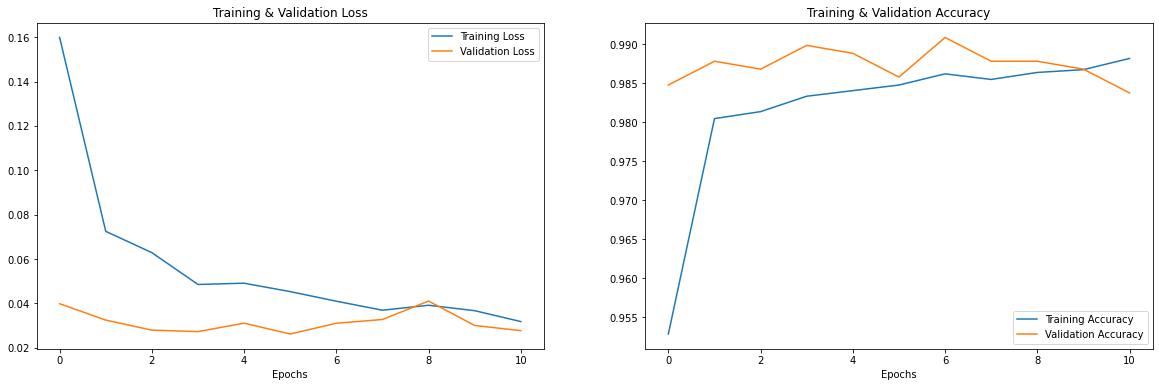

In [73]:
epochs = [i for i in range(11)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , val_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [74]:
print("Accuracy of our model on training data : ")
pann.evaluate(X_train_pca,y_train)[1]*100

Accuracy of our model on training data : 
175/175 [==============================] - 0s 941us/step - loss: 0.0321 - accuracy: 0.9878


98.78135919570923

In [75]:
print("Accuracy of our model on test data : ")
pann.evaluate(X_test_pca,y_test)[1]*100

Accuracy of our model on test data : 
37/37 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9879


98.79206418991089

# -----------------------------------------------------------------------------------------------

# 5. Reccursive Feature Elemination + Random Forest

In [208]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [209]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

In [210]:
rfe = RFECV(estimator=rfc)
rfe.fit(X_train, y_train)

RFECV(estimator=RandomForestClassifier(max_depth=10))

In [211]:
rfe.n_features_

20

In [212]:
from operator import itemgetter
features = final_df.iloc[:,:-1].columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 DispositionScore
1 OrbitalPeriod[days]
1 OrbitalPeriodUpperUnc.[days]
1 TransitEpoch[BKJD
1 TransitEpochUpperUnc.[BKJD]
1 ImpactParamete
1 ImpactParameterUpperUnc
1 TransitDuration[hrs]
1 TransitDurationUpperUnc.[hrs]
1 TransitDepth[ppm]
1 TransitDepthUpperUnc.[ppm]
1 PlanetaryRadius[Earthradii]
1 PlanetaryRadiusLowerUnc.[Earthradii]
1 EquilibriumTemperature[K]
1 InsolationFlux[Earthflux
1 InsolationFluxUpperUnc.[Earthflux]
1 InsolationFluxLowerUnc.[Earthflux]
1 TransitSignal-to-Nois
1 StellarEffectiveTemperatureUpperUnc.[K]
1 StellarEffectiveTemperatureLowerUnc.[K]
2 StellarSurfaceGravity[log10(cm/s**2)
3 StellarRadiusUpperUnc.[Solarradii]
4 StellarSurfaceGravityLowerUnc.[log10(cm/s**2)
5 RA[decimaldegrees
6 StellarSurfaceGravityUpperUnc.[log10(cm/s**2)
7 ImpactParameterLowerUnc
8 StellarRadius[Solarradii
9 Kepler-band[mag]
10 StellarRadiusLowerUnc.[Solarradii]
11 StellarEffectiveTemperature[K]
12 Dec[decimaldegrees
13 TCEPlanetNumber


In [213]:
y_pred = rfe.predict(X_train)

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train)

1.0

In [215]:
y_pred = rfe.predict(X_test)

In [216]:
accuracy_score(y_test,y_pred)

0.9870578084555651

# Results

In [115]:
models=['Dense Network', 'LSTM', 'Bidirectional', 'PCA + Dense Network', 'RFE + Random Forest']

# Accuracy

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
y_pred_ann_train=ann.predict(X_train).round()
y_pred_lstm_train=lstm.predict(xtrain)
y_pred_blstm_train=blstm.predict(xtrain)
y_pred_pca_train=pann.predict(X_train_pca).round()
y_pred_rfe_train=rfe.predict(X_train).round()

In [118]:
y_pr_lstm_train=[]
for i in range(len(y_train)):
    if(y_pred_lstm_train[i][0]>=0.5):
        y_pr_lstm_train.append(1)
    else:
        y_pr_lstm_train.append(0)

In [119]:
y_pr_blstm_train=[]
for i in range(len(y_train)):
    if(y_pred_blstm_train[i][0]>=0.5):
        y_pr_blstm_train.append(1)
    else:
        y_pr_blstm_train.append(0)

In [120]:
train_acc=[]
train_acc.append(accuracy_score(y_train,y_pred_ann_train))
train_acc.append(accuracy_score(y_train,y_pr_lstm_train))
train_acc.append(accuracy_score(y_train,y_pr_blstm_train))
train_acc.append(accuracy_score(y_train,y_pred_pca_train))
train_acc.append(accuracy_score(y_train,y_pred_rfe_train))

In [121]:
y_pred_ann_test=ann.predict(X_test).round()
y_pred_lstm_test=lstm.predict(xtest)
y_pred_blstm_test=blstm.predict(xtest)
y_pred_pca_test=pann.predict(X_test_pca).round()
y_pred_rfe_test=rfe.predict(X_test).round()

In [122]:
test_acc=[]
test_acc.append(accuracy_score(y_test,y_pred_ann_test))
y_pr_lstm_test=[]
for i in range(len(y_test)):
    if(y_pred_lstm_test[i][0]>=0.5):
        y_pr_lstm_test.append(1)
    else:
        y_pr_lstm_test.append(0)
test_acc.append(accuracy_score(y_test,y_pr_lstm_test))
y_pr_blstm_test=[]
for i in range(len(y_test)):
    if(y_pred_blstm_test[i][0]>=0.5):
        y_pr_blstm_test.append(1)
    else:
        y_pr_blstm_test.append(0)
test_acc.append(accuracy_score(y_test,y_pr_blstm_test))
test_acc.append(accuracy_score(y_test,y_pred_pca_test))
test_acc.append(accuracy_score(y_test,y_pred_rfe_test))

<AxesSubplot:>

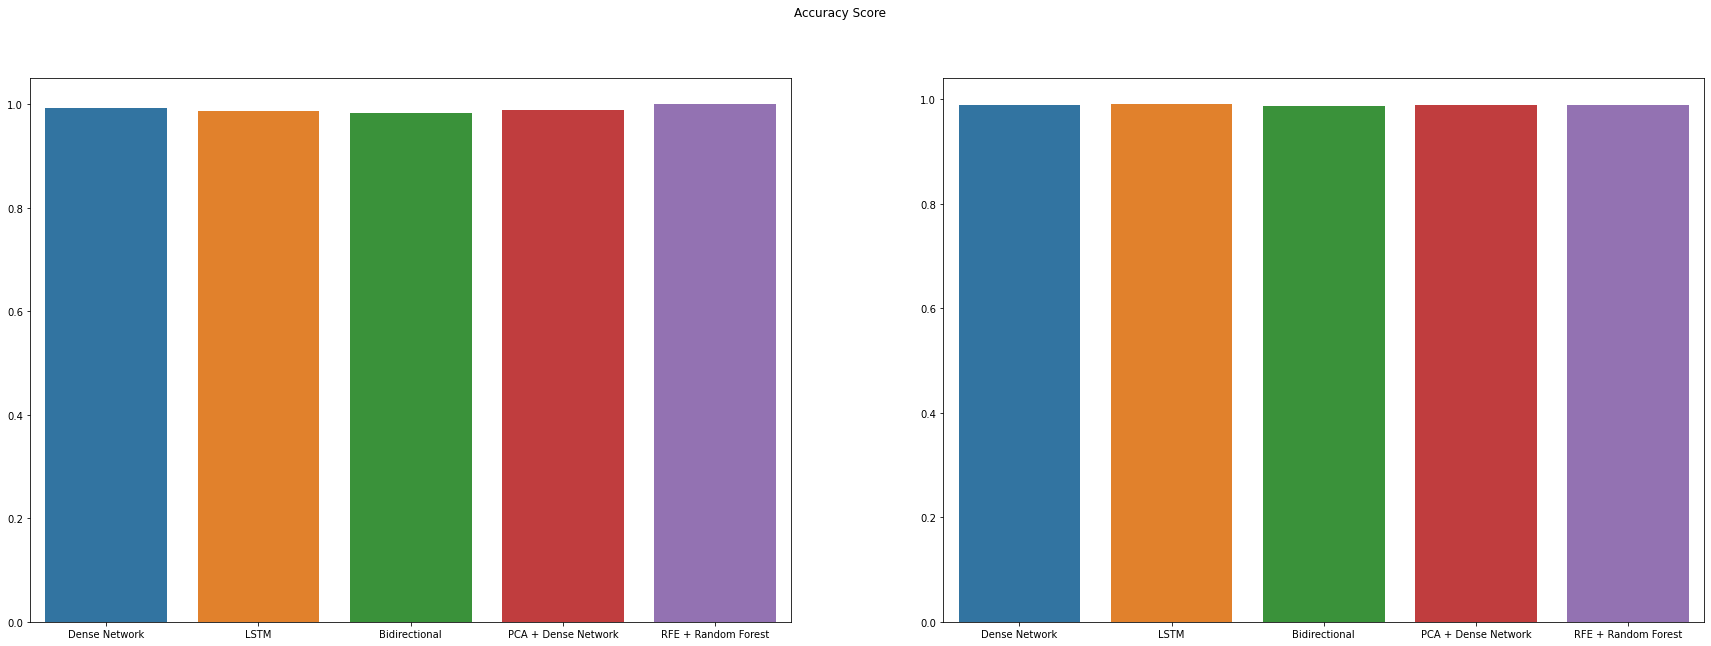

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Accuracy Score')
sns.barplot(ax=axes[0], x=models,y=train_acc)
sns.barplot(ax=axes[1], x=models,y=test_acc)

# Recall Score

In [124]:
from sklearn.metrics import recall_score

In [125]:
y_pred_ann_train=ann.predict(X_train).round()
y_pred_lstm_train=lstm.predict(xtrain)
y_pred_blstm_train=blstm.predict(xtrain)
y_pred_pca_train=pann.predict(X_train_pca).round()
y_pred_rfe_train=rfe.predict(X_train).round()

In [126]:
train_recall=[]
train_recall.append(recall_score(y_train,y_pred_ann_train))

In [127]:
y_pr_lstm_train=[]
for i in range(len(y_train)):
    if(y_pred_lstm_train[i][0]>=0.5):
        y_pr_lstm_train.append(1)
    else:
        y_pr_lstm_train.append(0)

In [128]:
train_recall.append(recall_score(y_train,y_pr_lstm_train))

In [129]:
y_pr_blstm_train=[]
for i in range(len(y_train)):
    if(y_pred_blstm_train[i][0]>=0.5):
        y_pr_blstm_train.append(1)
    else:
        y_pr_blstm_train.append(0)

In [130]:
train_recall.append(recall_score(y_train,y_pr_blstm_train))

In [131]:
train_recall.append(recall_score(y_train,y_pred_pca_train))
train_recall.append(recall_score(y_train,y_pred_rfe_train))

In [132]:
y_pred_ann_test=ann.predict(X_test).round()
y_pred_lstm_test=lstm.predict(xtest)
y_pred_blstm_test=blstm.predict(xtest)
y_pred_pca_test=pann.predict(X_test_pca).round()
y_pred_rfe_test=rfe.predict(X_test).round()

In [133]:
test_recall=[]
test_recall.append(recall_score(y_test,y_pred_ann_test))
y_pr_lstm_test=[]
for i in range(len(y_test)):
    if(y_pred_lstm_test[i][0]>=0.5):
        y_pr_lstm_test.append(1)
    else:
        y_pr_lstm_test.append(0)
test_recall.append(recall_score(y_test,y_pr_lstm_test))
y_pr_blstm_test=[]
for i in range(len(y_test)):
    if(y_pred_blstm_test[i][0]>=0.5):
        y_pr_blstm_test.append(1)
    else:
        y_pr_blstm_test.append(0)
test_recall.append(recall_score(y_test,y_pr_blstm_test))
test_recall.append(recall_score(y_test,y_pred_pca_test))
test_recall.append(recall_score(y_test,y_pred_rfe_test))

<AxesSubplot:>

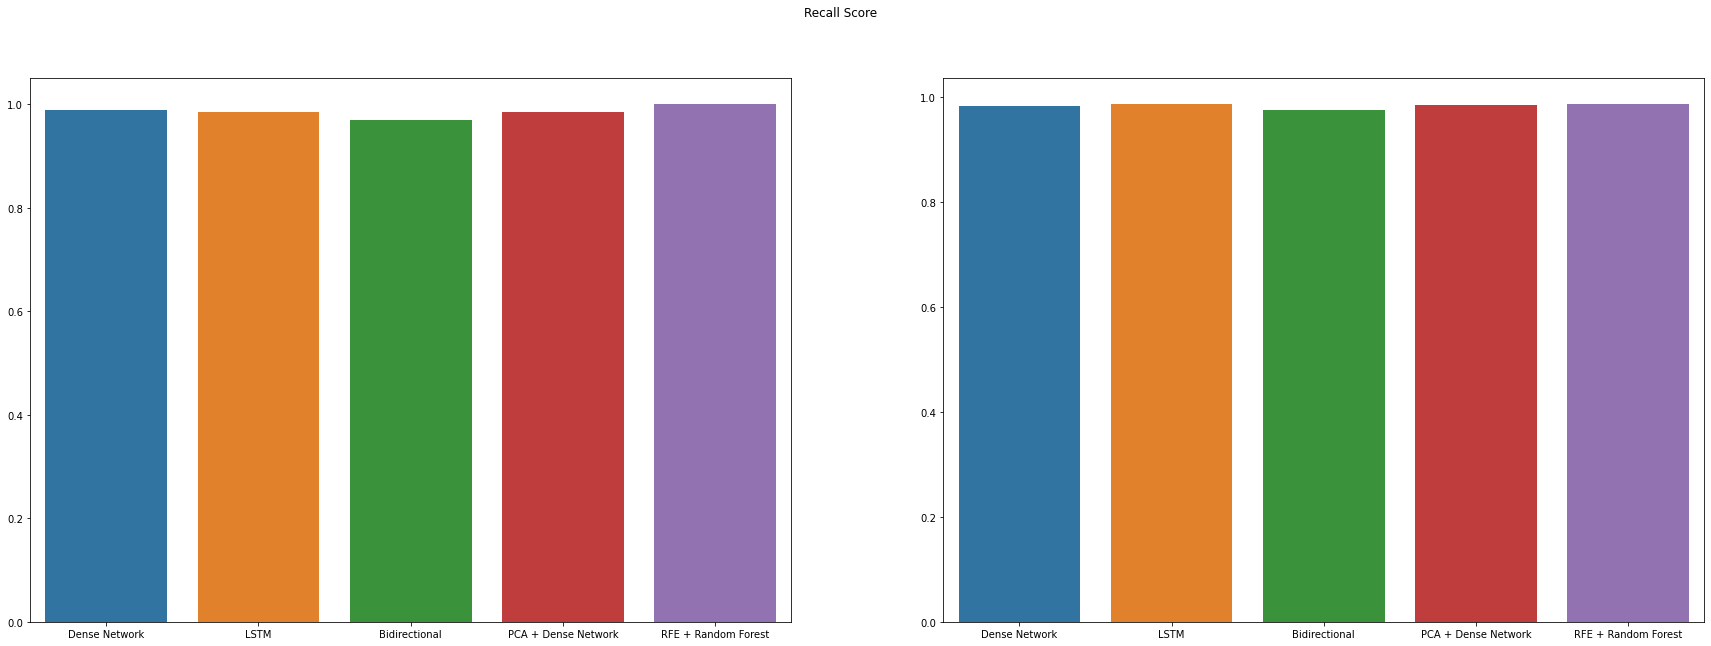

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Recall Score')
sns.barplot(ax=axes[0], x=models,y=train_recall)
sns.barplot(ax=axes[1], x=models,y=test_recall)

# Precision Score

In [135]:
from sklearn.metrics import precision_score


In [136]:
train_precision=[]
train_precision.append(precision_score(y_train,y_pred_ann_train))
train_precision.append(precision_score(y_train,y_pr_lstm_train))
train_precision.append(precision_score(y_train,y_pr_blstm_train))
train_precision.append(precision_score(y_train,y_pred_pca_train))
train_precision.append(precision_score(y_train,y_pred_rfe_train))

In [137]:
test_precision=[]
test_precision.append(precision_score(y_test,y_pred_ann_test))
test_precision.append(precision_score(y_test,y_pr_lstm_test))
test_precision.append(precision_score(y_test,y_pr_blstm_test))
test_precision.append(precision_score(y_test,y_pred_pca_test))
test_precision.append(precision_score(y_test,y_pred_rfe_test))

<AxesSubplot:>

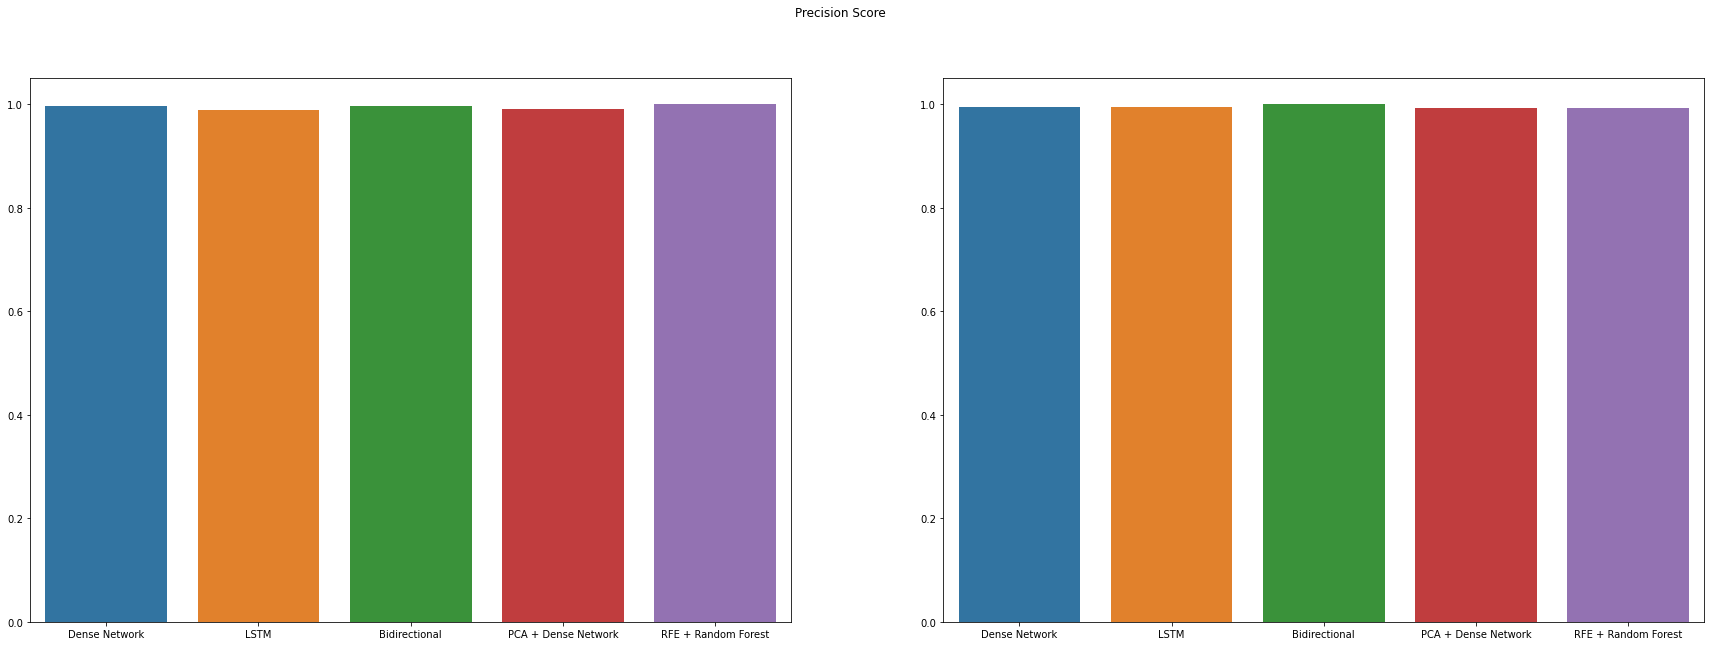

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Precision Score')
sns.barplot(ax=axes[0], x=models,y=train_precision)
sns.barplot(ax=axes[1], x=models,y=test_precision)

# F1 Score

In [139]:
from sklearn.metrics import f1_score

In [140]:
train_f1_score=[]
train_f1_score.append(f1_score(y_train,y_pred_ann_train))
train_f1_score.append(f1_score(y_train,y_pr_lstm_train))
train_f1_score.append(f1_score(y_train,y_pr_blstm_train))
train_f1_score.append(f1_score(y_train,y_pred_pca_train))
train_f1_score.append(f1_score(y_train,y_pred_rfe_train))

In [141]:
test_f1_score=[]
test_f1_score.append(f1_score(y_test,y_pred_ann_test))
test_f1_score.append(f1_score(y_test,y_pr_lstm_test))
test_f1_score.append(f1_score(y_test,y_pr_blstm_test))
test_f1_score.append(f1_score(y_test,y_pred_pca_test))
test_f1_score.append(f1_score(y_test,y_pred_rfe_test))

<AxesSubplot:>

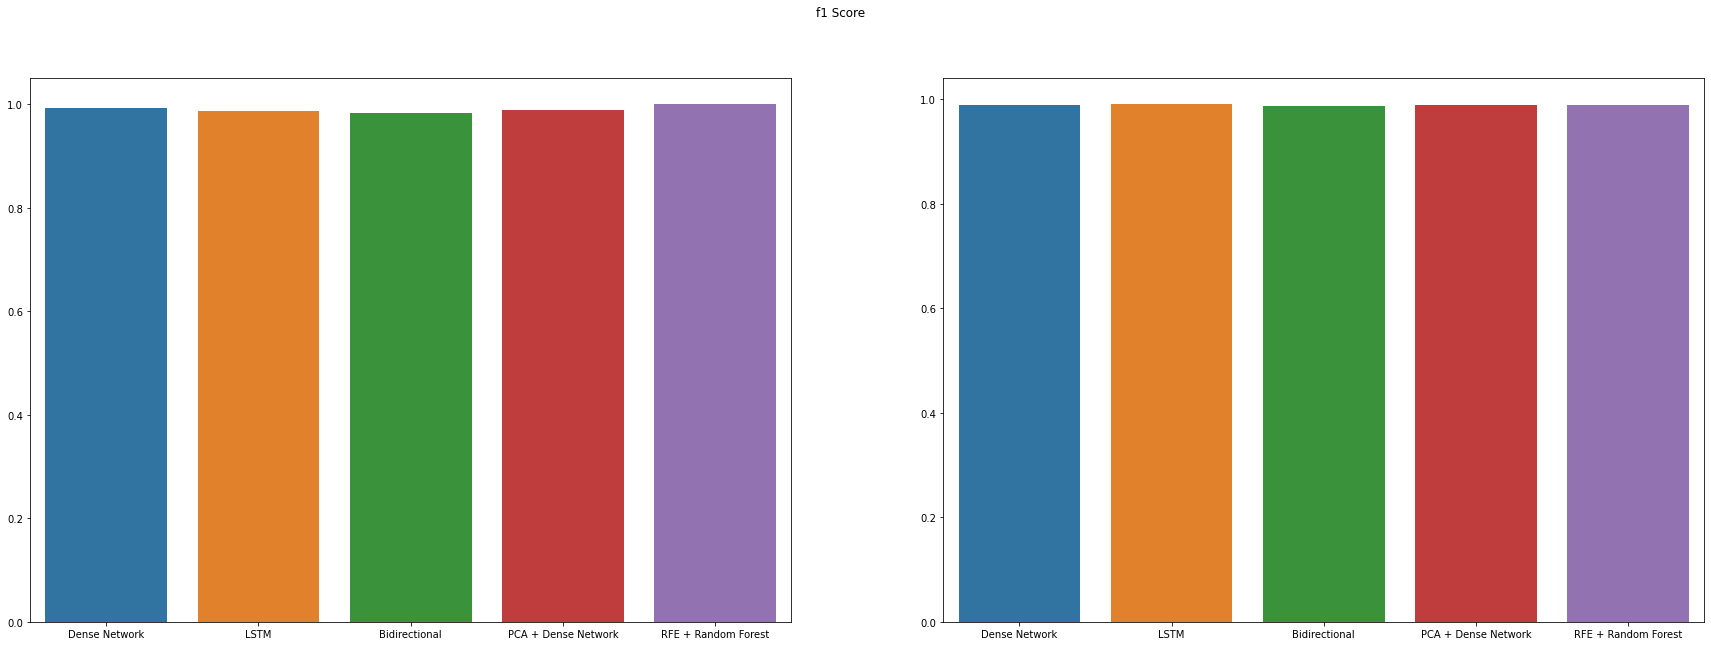

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('f1 Score')
sns.barplot(ax=axes[0], x=models,y=train_f1_score)
sns.barplot(ax=axes[1], x=models,y=test_f1_score)

# ROC AUC Score

In [143]:
from sklearn.metrics import roc_auc_score

In [144]:
train_auc_score=[]
train_auc_score.append(roc_auc_score(y_train,y_pred_ann_train))
train_auc_score.append(roc_auc_score(y_train,y_pr_lstm_train))
train_auc_score.append(roc_auc_score(y_train,y_pr_blstm_train))
train_auc_score.append(roc_auc_score(y_train,y_pred_pca_train))
train_auc_score.append(roc_auc_score(y_train,y_pred_rfe_train))

In [145]:
test_auc_score=[]
test_auc_score.append(roc_auc_score(y_test,y_pred_ann_test))
test_auc_score.append(roc_auc_score(y_test,y_pr_lstm_test))
test_auc_score.append(roc_auc_score(y_test,y_pr_blstm_test))
test_auc_score.append(roc_auc_score(y_test,y_pred_pca_test))
test_auc_score.append(roc_auc_score(y_test,y_pred_rfe_test))

<AxesSubplot:>

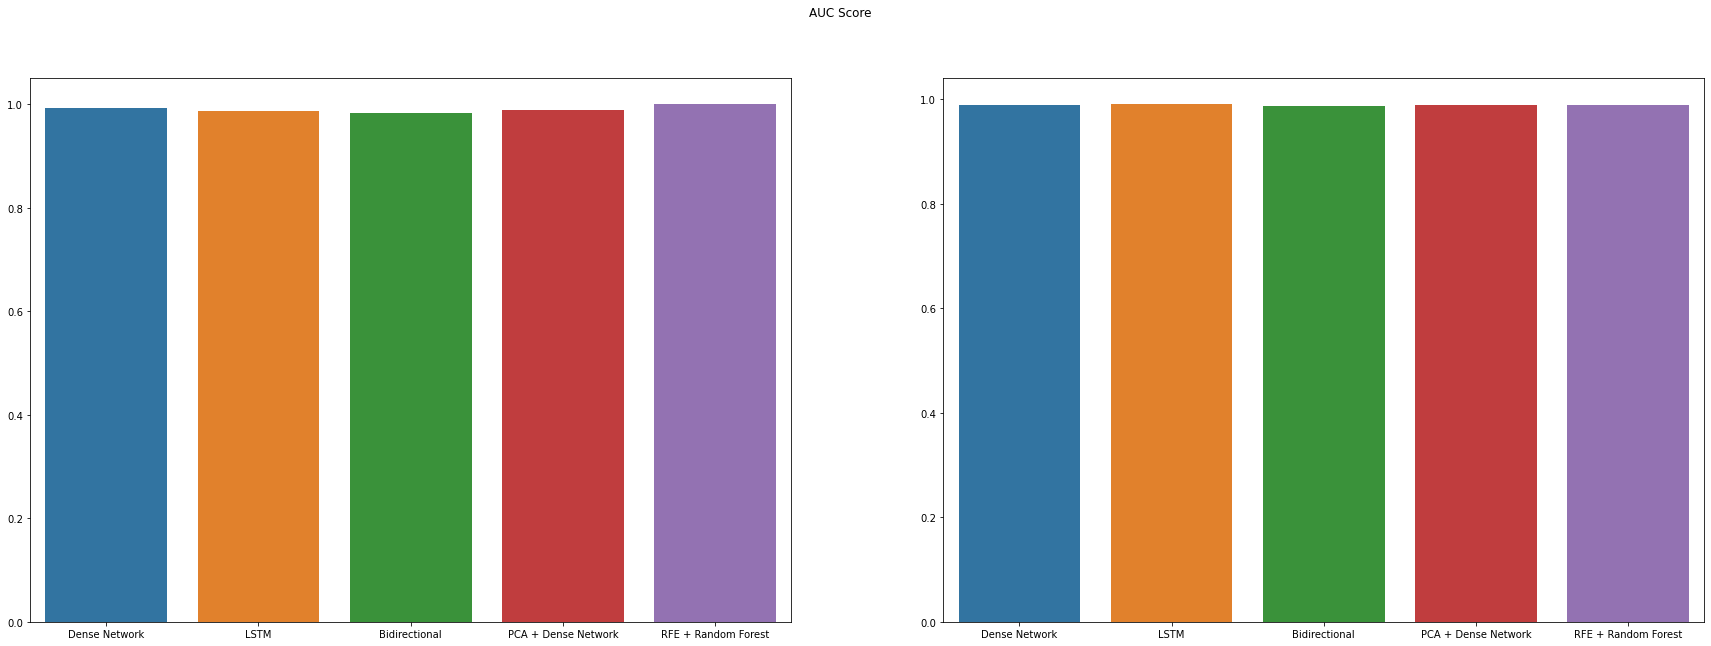

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('AUC Score')
sns.barplot(ax=axes[0], x=models,y=train_auc_score)
sns.barplot(ax=axes[1], x=models,y=test_auc_score)

# Log Loss

In [147]:
from sklearn.metrics import log_loss

In [148]:
train_log_loss_score=[]
train_log_loss_score.append(log_loss(y_train,y_pred_ann_train,eps=1e-7))
train_log_loss_score.append(log_loss(y_train,y_pr_lstm_train,eps=1e-7))
train_log_loss_score.append(log_loss(y_train,y_pr_blstm_train,eps=1e-7))
train_log_loss_score.append(log_loss(y_train,y_pred_pca_train,eps=1e-7))
train_log_loss_score.append(log_loss(y_train,y_pred_rfe_train,eps=1e-7))

In [149]:
test_log_loss_score=[]
test_log_loss_score.append(log_loss(y_test,y_pred_ann_test,eps=1e-7))
test_log_loss_score.append(log_loss(y_test,y_pr_lstm_test,eps=1e-7))
test_log_loss_score.append(log_loss(y_test,y_pr_blstm_test,eps=1e-7))
test_log_loss_score.append(log_loss(y_test,y_pred_pca_test,eps=1e-7))
test_log_loss_score.append(log_loss(y_test,y_pred_rfe_test,eps=1e-7))

<AxesSubplot:>

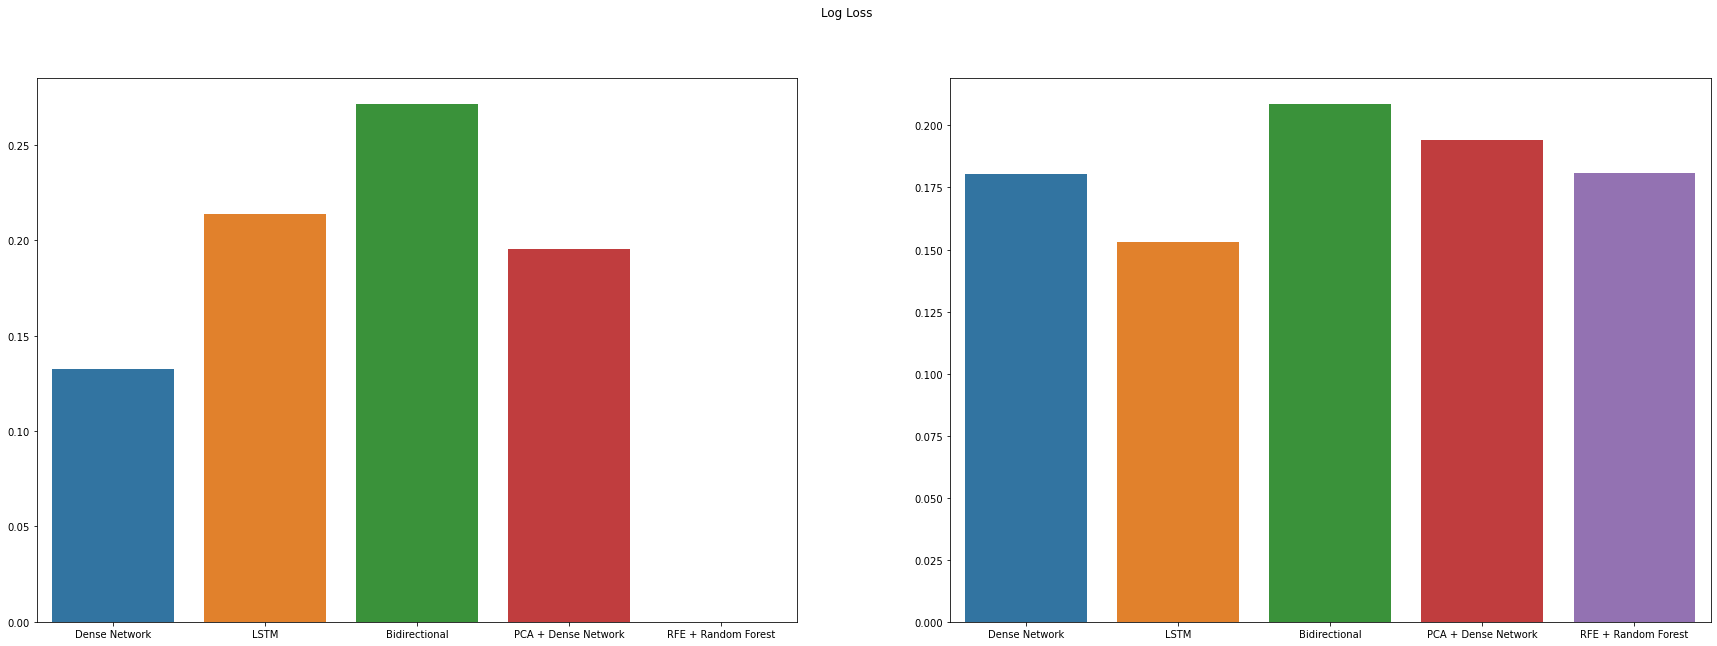

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Log Loss')
sns.barplot(ax=axes[0], x=models,y=train_log_loss_score)
sns.barplot(ax=axes[1], x=models,y=test_log_loss_score)

# Confusion Matrix

In [151]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix for Dense Model')

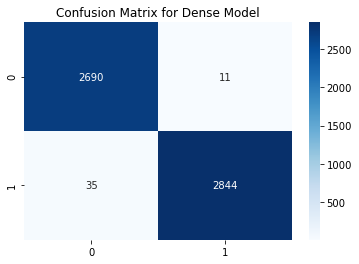

In [152]:
cm=confusion_matrix(y_train,y_pred_ann_train)
ax = plt.axes()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',ax = ax)
ax.set_title('Confusion Matrix for Dense Model')

Text(0.5, 1.0, 'Confusion Matrix for LSTM Model')

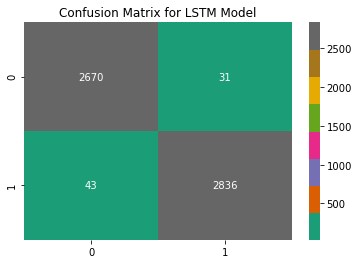

In [153]:
cm=confusion_matrix(y_train,y_pr_lstm_train)
ax = plt.axes()
sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g',ax = ax)
ax.set_title('Confusion Matrix for LSTM Model')

Text(0.5, 1.0, 'Confusion Matrix for Bidirectional Model')

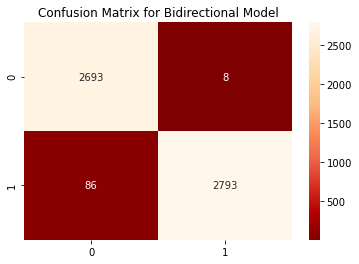

In [154]:
cm=confusion_matrix(y_train,y_pr_blstm_train)
ax = plt.axes()
sns.heatmap(cm, annot=True, cmap='OrRd_r', fmt='g',ax = ax)
ax.set_title('Confusion Matrix for Bidirectional Model')

Text(0.5, 1.0, 'Confusion Matrix for PCA+Dense Model')

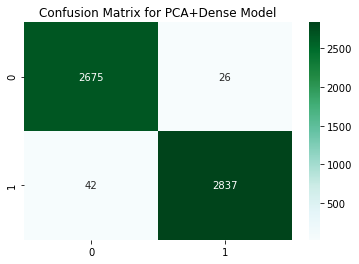

In [155]:
cm=confusion_matrix(y_train,y_pred_pca_train)
ax = plt.axes()
sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g',ax = ax)
ax.set_title('Confusion Matrix for PCA+Dense Model')

Text(0.5, 1.0, 'Confusion Matrix for RFE+Random Forest Model')

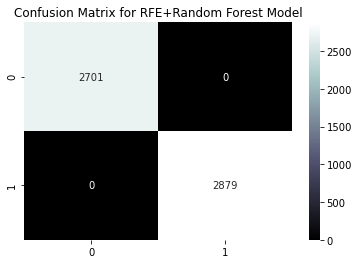

In [156]:
cm=confusion_matrix(y_train,y_pred_rfe_train)
ax = plt.axes()
sns.heatmap(cm, annot=True, cmap='bone', fmt='g',ax = ax)
ax.set_title('Confusion Matrix for RFE+Random Forest Model')

# Evaluation Table

In [157]:
evaluation={'models':models, 'accuracy-train':train_acc, 'accuracy-test':test_acc,
            'recall-train':train_recall, 'recall-test':test_recall, 'precision-train':train_precision, 'precision-test': test_precision,
           'f1_score-train':train_f1_score, 'f1_score-test':test_f1_score, 'AUC-train':train_auc_score, 'AUC-test': test_auc_score,
           'log_loss-train':train_log_loss_score,'log_loss-test':test_log_loss_score}

In [158]:
evaluation_scores=pd.DataFrame(evaluation)

In [159]:
evaluation_scores.index=evaluation_scores.models
evaluation_scores.drop(columns=['models'],inplace=True)
evaluation_scores

,accuracy-train,accuracy-test,recall-train,recall-test,precision-train,precision-test,f1_score-train,f1_score-test,AUC-train,AUC-test,log_loss-train,log_loss-test
models,,,,,,,,,,,,
Dense Network,0.991756,0.988783,0.987843,0.983333,0.996147,0.994941,0.991978,0.989103,0.991885,0.988983,1.325269e-01,0.180335
LSTM,0.986738,0.990509,0.985064,0.986667,0.989187,0.994958,0.987121,0.990795,0.986794,0.990650,2.137526e-01,0.152976
Bidirectional,0.983154,0.987058,0.970129,0.975000,0.997144,1.000000,0.983451,0.987342,0.983583,0.987500,2.715236e-01,0.208604
PCA + Dense Network,0.987814,0.987921,0.985412,0.985000,0.990919,0.991611,0.988157,0.988294,0.987893,0.988028,1.956026e-01,0.193939
RFE + Random Forest,1.000000,0.988783,1.000000,0.986667,1.000000,0.991625,1.000000,0.989140,1.000000,0.988861,1.000000e-07,0.180790
